_Alex Malz (NYU)_
_(Add your name here when contributing.)_

_Christian Setzer (Stockholm University)_


# PRObabilistic CLAssification Metrics

This notebook explores the behavior of a number of classification metrics, drawn from [discussions](https://docs.google.com/document/d/1pg0KUY0KihjlWKwoCE7Fc29u9pjv-fhwUnL8o34s58k/edit#) in the context of PLAsTiCC.

Many classification metrics are already implemented in [`scikit-learn`](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

In [43]:
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt

Define the true classes for each object and the corresponding classifier results that will be used in this notebook

In [45]:
# Binary Class Mock Data 

# Define binary labels for true class of data
binary_true_class = np.array([0,0,1,1,0,1,0,0,1,0,1,1,0])

# Define target scores, probability of the positive (class == 1) class
# in the binary classification scenario
binary_scores = np.array([0.1,0.4,0.35,0.8,0.2,0.9,0.15,0.3,0.75,0.6,0.5,0.8,0.4])


# Receiver Operating Curve (ROC) and ROC Area Under Curve (AUC)

[on Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
### ROC
Pros
* Works with multi-label data

Cons
* Doesn't naturally work with multi-class data
* Need results from classifier in a probabilistic format

In [42]:
from sklearn.metrics import roc_curve

# Pass true classes and classifier scores, to roc function to return 
# false postive rate, true positive rate and associated threshold values
false_pr, true_pr, thresholds = roc_curve(binary_true_class,binary_scores)

# Show the results of computation from ROC funciton 
# Useful for comparison to online examples
#print(false_pr)
#print(true_pr)
#print(thresholds)

#Continue Below 

### AUC
Pros
* Commonly used

Cons
* Not good for sparse classes
* "Noisy" metric

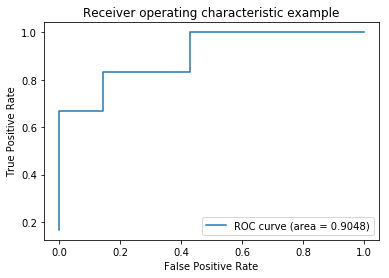

In [49]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(true_class,scores)

# Output the AUC
#print(auc)

# Simple plot of the resulting ROC curve with associated AUC
plt.figure()
plt.plot(false_pr,true_pr,label='ROC curve (area = %0.4f)' %auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Standard Score (zROC)

[on Wikipedia](https://en.wikipedia.org/wiki/Standard_score)

Pros

Cons
* Not implemented in `scikit-learn`

In [4]:
# write it!

### Detection Error Tradeoff (DET) Graph

[on Wikipedia](https://en.wikipedia.org/wiki/Detection_error_tradeoff)

Pros
* More sensitive to areas of interest than ROC

Cons
* Not implemented in `scikit-learn`

In [5]:
# write it!

## Log-Loss

[on Wikipedia](https://en.wikipedia.org/wiki/Loss_functions_for_classification)

The Log-loss metric outputs a value that is meant to be minimized. A perfect
classifier would have  `log-loss = 0`. A perfectly random classifier would have `log-loss = log(number_classes)`

Pros
* `scikit-learn` implementation works with multi-class data

Cons
* Doesn't naturally work with multi-class data (Christian: I disagree on this point) 

In [60]:
from sklearn.metrics import log_loss

# Compute the log loss value for the binary class case
# Normalize = True gives log-loss average per sample (this is the default)
binary_log_loss = log_loss(binary_true_class,binary_scores, normalize=True)

# Print out the resulting mean log loss value per sample for evaultion against
# the results of other classifiers
print('%0.4f' %binary_log_loss)

0.4129


## Brier score

[on Wikipedia](https://en.wikipedia.org/wiki/Brier_score)

Pros
* Naturally works with multi-class data
* Intuitively interpretable

Cons
* `scikit-learn` implementation only works with binary classes

In [7]:
from sklearn.metrics import brier_score_loss

## Precision-Recall Curve (PRC)

[on Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)

Pros

Cons

In [8]:
from sklearn.metrics import precision_recall_curve

### PRC Area Under Curve (AUC)

[not on Wikipedia](https://andybeger.com/2015/03/16/precision-recall-curves/)

Pros
* Better for sparse data than ROC AUC

Cons
* Doesn't naturally work with multi-class data

In [9]:
from sklearn.metrics import auc

### PRC Average Precision Score

Pros
* Less optimistic than PRC AUC

Cons

In [10]:
from sklearn.metrics import average_precision_score

## Other modifications of deterministic metrics?

## Impact of converting classifications from deterministic to probabilistic?